📊 Data Analysis Overview

1. ✔️ Data Cleaning & Preprocessing (Removing stopwords, punctuation, lowercasing) 🧹
2. ✔️ Sentiment Analysis (Classify reviews as positive, negative, or neutral) 😊😡😐
3. ✔️ Word Frequency & WordCloud (Find common words) 🔤💭
4. ✔️ Named Entity Recognition (NER) (Extract airline names, locations, dates) 🏷️🌍📅
5. ✔️ Topic Modeling (LDA) (Discover common topics in reviews) 🧠🔍
6. ✔️ Customer Complaint Analysis (Identify issues like delays, lost baggage, customer service) 💼✈️📦

In [6]:
import pandas as pd

### 1. Load the Dataset

In [7]:
df = pd.read_csv('data/cleaned_data.csv')

### 2. Basic Exploration

In [7]:
# Check the first few rows
print(df.head())

     Verified                                             Review
0  unverified  good flight following equally good flight rome...
1  unverified  hour delay due late arrival incoming aircraft ...
2    verified  booked ba loganair dont representative manches...
3    verified  british airway lost bag lar found sent cologne...
4    verified  check process rewardloyalty program mess never...


In [8]:
# Get basic info (column names, missing values, data types)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Verified  1000 non-null   object
 1   Review    1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB
None


In [9]:
# Check for missing values
print(df.isnull().sum())

Verified    0
Review      0
dtype: int64


In [10]:
# Check unique values in the 'Verified' column
print(df['Verified'].value_counts())

Verified
verified      739
unverified    261
Name: count, dtype: int64


### 3. Sentiment Analysis

In [15]:
# Analyze customer sentiment (positive, negative, neutral):
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

df["Sentiment_Score"] = df["Review"].apply(lambda x: sia.polarity_scores(x)['compound'])

# Classify sentiment based on score
df["Sentiment_Label"] = df["Sentiment_Score"].apply(lambda x: "Positive" if x > 0 else ("Negative" if x < 0 else "Neutral"))

print(df["Sentiment_Label"].value_counts())  # Check sentiment distribution

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lucky/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Sentiment_Label
Positive    546
Negative    448
Neutral       6
Name: count, dtype: int64


In [13]:
# Display positive reviews
print("Positive Reviews:")
print(df[df["Sentiment_Label"] == "Positive"][["Review", "Sentiment_Score"]])

# Display negative reviews
print("\nNegative Reviews:")
print(df[df["Sentiment_Label"] == "Negative"][["Review", "Sentiment_Score"]])

# Display neutral reviews
print("\nNeutral Reviews:")
print(df[df["Sentiment_Label"] == "Neutral"][["Review", "Sentiment_Score"]])

Positive Reviews:
                                                Review  Sentiment_Score
0    good flight following equally good flight rome...           0.8271
1    hour delay due late arrival incoming aircraft ...           0.8442
7    excellent flight cut lar return good ba moved ...           0.9877
9    flight ba arrived rome december passenger rece...           0.6474
11   pretty good flight still small thing improved ...           0.9945
..                                                 ...              ...
988  london johannesburg british airway one commerc...           0.9796
990  stress free journey or old autistic son or old...           0.9808
991  edinburgh koala lumper via london returned al ...           0.9543
994  london shanghai concorde room heathrow termina...           0.9880
996  good morning would like write review british a...           0.9850

[546 rows x 2 columns]

Negative Reviews:
                                                Review  Sentiment_Score
2  

### 4. Word Frequency Analysis

In [14]:
# Most Common Words
from collections import Counter

word_list = " ".join(df['Review']).split()
word_freq = Counter(word_list)

print(word_freq.most_common(10))

[('flight', 2281), ('ba', 1405), ('seat', 827), ('service', 785), ('time', 666), ('hour', 617), ('airline', 485), ('london', 465), ('crew', 460), ('british', 453)]


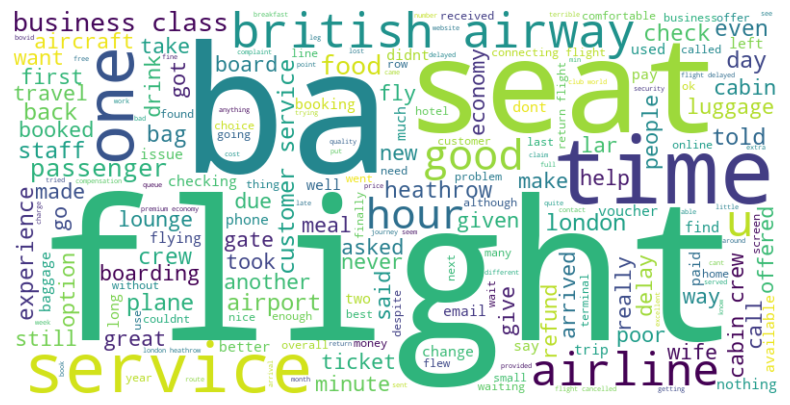

In [17]:
# Word Cloud Visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df['Review']))

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### 5. Named Entity Recognition (NER)

In [8]:
# Identify important entities such as airline names, places, and date
import spacy

nlp = spacy.load("en_core_web_sm")

def extract_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

df["Entities"] = df["Review"].apply(extract_entities)
print(df["Entities"].head())

0                                                   []
1                                       [(hour, TIME)]
2    [(manchester airport, FAC), (complaint departm...
3    [(british, NORP), (two day, DATE), (one, CARDI...
4                                                   []
Name: Entities, dtype: object


### 6. Topic Modeling (Latent Dirichlet Allocation - LDA)

In [13]:
# If you want to discover common topics in reviews
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words="english")
X = vectorizer.fit_transform(df["Review"])

lda = LatentDirichletAllocation(n_components=3, random_state=42)  # Choose 3 topics
lda.fit(X)

# Display top words in each topic
words = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx + 1}: {[words[i] for i in topic.argsort()[-10:]]}")

Topic 1: ['service', 'day', 'customer', 'airline', 'airway', 'told', 'british', 'hour', 'ba', 'flight']
Topic 2: ['booking', 'british', 'london', 'airway', 'cancelled', 'time', 'customer', 'service', 'ba', 'flight']
Topic 3: ['time', 'cabin', 'class', 'good', 'service', 'food', 'crew', 'ba', 'seat', 'flight']


### 7. Sentiment Analysis by Verified/Unverified Users

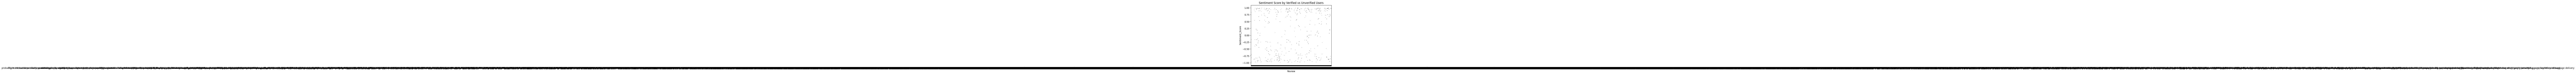

In [18]:
# Compare sentiment between verified and unverified users
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df['Review'], y=df['Sentiment_Score'])
plt.title("Sentiment Score by Verified vs Unverified Users")
plt.show()

### 8. Airline Issues Extraction

In [20]:
# Extract common complaints
df["Contains_Delay"] = df["Review"].apply(lambda x: "delay" in x)
df["Contains_Lost_Baggage"] = df["Review"].apply(lambda x: "lost" in x and "bag" in x)
df["Contains_Customer_Service"] = df["Review"].apply(lambda x: "customer service" in x)

print(df[["Contains_Delay", "Contains_Lost_Baggage", "Contains_Customer_Service"]].sum())

Contains_Delay               221
Contains_Lost_Baggage         28
Contains_Customer_Service    169
dtype: int64


### 9. Save Processed Data 

In [22]:
df.to_csv("data/processed_reviews.csv", index=False)